In [1]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }a
</style>
"""))

In [2]:
#!pip install lxml
#! pip install unidecode
#! pip install selenium

In [3]:
#! pip install bs4

In [4]:
#! pip install webdriver_manager

In [5]:
#! pip install chardet

In [6]:
import time
import requests
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver import ActionChains
import pandas as pd
import numpy as np
import os
import time
import re
import unidecode
import time 
from bs4 import BeautifulSoup
from selenium.webdriver.support.ui import Select
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt 
import chardet
import geopandas as gpd

## 2 Import "Data Dengue infected by district for 2015 to 2021"

In [7]:
base = open(r'../../_data/data_dengue_peru.csv', 'rb').read()
det = chardet.detect(base)
charenc = det['encoding']
charenc

'UTF-8-SIG'

In [8]:
table1 = pd.read_csv('../../_data/data_dengue_peru.csv', encoding = charenc, thousands = ",", dtype= {"Ubigeo":"str"})
table1

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,0.0
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0
...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN


In [9]:
table1.dtypes

Año                  int64
Semana               int64
Eventos o daños     object
Departamento        object
Distrito            object
Provincia           object
Ubigeo              object
Casos              float64
dtype: object

In [10]:
table1 ['Año'].unique()

array([2020, 2021, 2019, 2017, 2016, 2018, 2015], dtype=int64)

## 3 Generate ubigeo for Departments and Provinces taking the first two and four numbers. Hint: Use this code.

In [11]:
table1['Ubigeo_Departments'] = table1['Ubigeo'].astype(str).str[:2]
table1

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,Ubigeo_Departments
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0,08
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,0.0,08
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0,08
...,...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17


In [12]:
table1['Ubigeo_Provinces'] = table1['Ubigeo'].astype(str).str[:4]
table1

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,Ubigeo_Departments,Ubigeo_Provinces
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0,08,0809
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,1801
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,1801
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,0.0,08,0809
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0,08,0809
...,...,...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17,1702
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17,1703
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17,1702
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17,1703


In [13]:
table1.dtypes

Año                     int64
Semana                  int64
Eventos o daños        object
Departamento           object
Distrito               object
Provincia              object
Ubigeo                 object
Casos                 float64
Ubigeo_Departments     object
Ubigeo_Provinces       object
dtype: object

## 4 Use geopandas to plot the number of cases in 2021 by the district using a continuous legend. Do not forget to indicate the color of NA values. Use this shapefile.

In [14]:
table2 = gpd.read_file( r'..\..\_data\LIMITE_DISTRITAL_2020_INEI\INEI_LIMITE_DISTRITAL.shp' )
table2

,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,CAPITAL,UBIGEO,IDPROV,CODIGO,CNT_CCPP,DESCRIPCIO,DESCARGAR,WHATSAPP,CONTACTO,geometry
0,06,CAJAMARCA,05,CONTUMAZA,04,GUZMANGO,GUZMANGO,060504,0605,060504,50,GUZMANGO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322..."
1,06,CAJAMARCA,11,SAN MIGUEL,05,EL PRADO,EL PRADO,061105,0611,061105,15,EL PRADO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969..."
2,06,CAJAMARCA,11,SAN MIGUEL,09,NIEPOS,NIEPOS,061109,0611,061109,41,NIEPOS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851..."
3,06,CAJAMARCA,11,SAN MIGUEL,10,SAN GREGORIO,SAN GREGORIO,061110,0611,061110,48,SAN GREGORIO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005..."
4,06,CAJAMARCA,12,SAN PABLO,03,SAN LUIS,SAN LUIS GRANDE,061203,0612,061203,9,SAN LUIS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,04,AREQUIPA,04,CASTILLA,04,CHACHAS,CHACHAS,040404,0404,040404,19,CHACHAS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8..."
1870,04,AREQUIPA,04,CASTILLA,05,CHILCAYMARCA,CHILCAYMARCA,040405,0404,040405,24,CHILCAYMARCA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-72.37490 -15.24990, -72.37494 -15.2..."
1871,04,AREQUIPA,04,CASTILLA,06,CHOCO,CHOCO,040406,0404,040406,58,CHOCO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-71.96976 -15.13597, -71.96952 -15.1..."
1872,04,AREQUIPA,04,CASTILLA,07,HUANCARQUI,HUANCARQUI,040407,0404,040407,25,HUANCARQUI,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-72.31258 -15.81426, -72.31211 -15.8..."


In [15]:
table2 ['NOMBDEP'].unique()

array(['CAJAMARCA', 'LAMBAYEQUE', 'LIMA', 'ANCASH', 'AREQUIPA', 'CUSCO',
       'AYACUCHO', 'HUANCAVELICA', 'APURIMAC', 'PIURA', 'TACNA', 'JUNIN',
       'HUANUCO', 'UCAYALI', 'MADRE DE DIOS', 'PUNO', 'LA LIBERTAD',
       'TUMBES', 'CALLAO', 'AMAZONAS', 'LORETO', 'SAN MARTIN', 'ICA',
       'PASCO', 'MOQUEGUA'], dtype=object)

In [16]:
table2.dtypes

CCDD            object
NOMBDEP         object
CCPP            object
NOMBPROV        object
CCDI            object
NOMBDIST        object
CAPITAL         object
UBIGEO          object
IDPROV          object
CODIGO          object
CNT_CCPP         int64
DESCRIPCIO      object
DESCARGAR       object
WHATSAPP        object
CONTACTO        object
geometry      geometry
dtype: object

In [17]:
table2['UBIGEO'].unique().size

1874

In [18]:
table3 = table2[['UBIGEO', 'geometry']]
table3 = table3.rename(columns={'UBIGEO':'Ubigeo'})
table3

,Ubigeo,geometry
0,060504,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322..."
1,061105,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969..."
2,061109,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851..."
3,061110,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005..."
4,061203,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098..."
...,...,...
1869,040404,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8..."
1870,040405,"POLYGON ((-72.37490 -15.24990, -72.37494 -15.2..."
1871,040406,"POLYGON ((-71.96976 -15.13597, -71.96952 -15.1..."
1872,040407,"POLYGON ((-72.31258 -15.81426, -72.31211 -15.8..."


In [19]:
# Longitud-Latitud projection
table3.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [20]:
dengue_2021 = table1[table1.Año == 2021]
dengue_2021

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,Ubigeo_Departments,Ubigeo_Provinces
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,1801
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,1801
6,2021,41,Dengue,LIMA,INDEPENDENCIA,LIMA,150112,NaN,15,1501
7,2021,41,Dengue,LIMA,VILLA MARIA DEL TRIUNFO,LIMA,150143,NaN,15,1501
8,2021,41,Dengue,LIMA,ATE,LIMA,150103,NaN,15,1501
...,...,...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17,1702
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17,1703
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17,1702
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17,1703


In [30]:
dengue_shpa= table3.merge(dengue_2021)
dengue_shpa

,Ubigeo,geometry,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Casos,Ubigeo_Departments,Ubigeo_Provinces
0,140106,"POLYGON ((-79.83314 -6.78666, -79.83225 -6.790...",2021,20,Dengue,LAMBAYEQUE,LA VICTORIA,CHICLAYO,1.0,14,1401
1,140106,"POLYGON ((-79.83314 -6.78666, -79.83225 -6.790...",2021,21,Dengue,LAMBAYEQUE,LA VICTORIA,CHICLAYO,0.0,14,1401
2,140106,"POLYGON ((-79.83314 -6.78666, -79.83225 -6.790...",2021,41,Dengue,LAMBAYEQUE,LA VICTORIA,CHICLAYO,NaN,14,1401
3,140106,"POLYGON ((-79.83314 -6.78666, -79.83225 -6.790...",2021,42,Dengue,LAMBAYEQUE,LA VICTORIA,CHICLAYO,NaN,14,1401
4,140106,"POLYGON ((-79.83314 -6.78666, -79.83225 -6.790...",2021,43,Dengue,LAMBAYEQUE,LA VICTORIA,CHICLAYO,NaN,14,1401
...,...,...,...,...,...,...,...,...,...,...,...
24852,120604,"POLYGON ((-73.98589 -11.93382, -73.98628 -11.9...",2021,15,Dengue,JUNIN,MAZAMARI,SATIPO,6.0,12,1206
24853,120604,"POLYGON ((-73.98589 -11.93382, -73.98628 -11.9...",2021,16,Dengue,JUNIN,MAZAMARI,SATIPO,6.0,12,1206
24854,120604,"POLYGON ((-73.98589 -11.93382, -73.98628 -11.9...",2021,20,Dengue,JUNIN,MAZAMARI,SATIPO,7.0,12,1206
24855,120604,"POLYGON ((-73.98589 -11.93382, -73.98628 -11.9...",2021,21,Dengue,JUNIN,MAZAMARI,SATIPO,5.0,12,1206


In [22]:
#dengue_shp = table3.merge(dengue_2021, how = "left", left_on=['UBIGEO'], right_on=['Ubigeo'])
#dengue_shp

<AxesSubplot:>

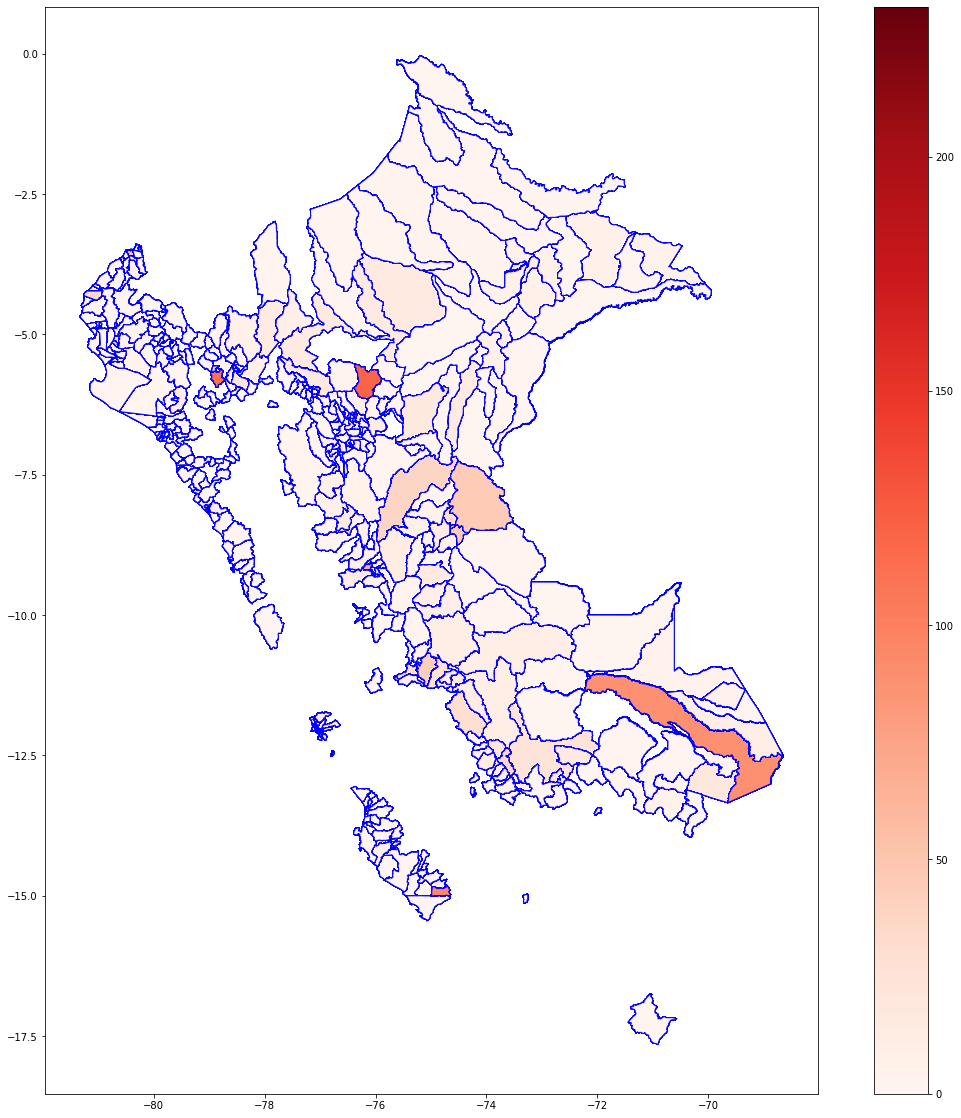

In [31]:
dengue_shpa.plot( column='Casos', cmap='Reds', 
          figsize=(20, 20),
          linestyle='-',
          edgecolor='blue',
          legend = True )

<AxesSubplot:>

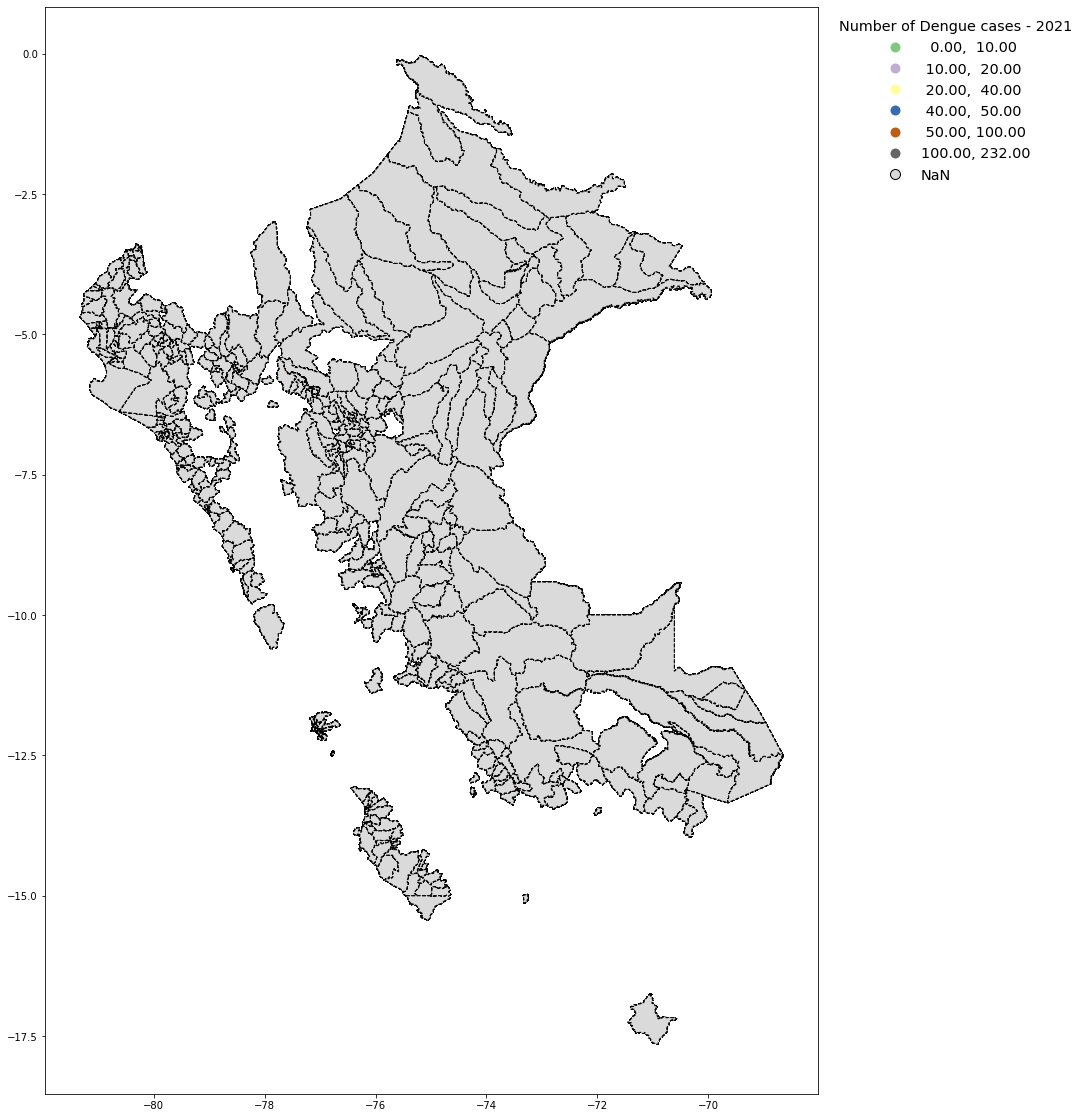

In [46]:
fig1, ax = plt.subplots(figsize=(20, 20))
dengue_shpa.plot( ax = ax, 
        column='Casos', 
         cmap= 'Accent', 
         figsize=(20, 20), 
         linestyle='--',
         edgecolor='black', 
         legend = True,  
         scheme = "User_Defined", 
         missing_kwds= dict(color = "#DADADB",), 
         classification_kwds = dict( bins = [ 10, 20, 40, 50,  100 ] ), 
         legend_kwds=dict(  loc='upper left',
                            bbox_to_anchor=(1.01, 1),
                            fontsize='x-large',
                            title= "Number of Dengue cases - 2021", 
                            title_fontsize = 'x-large', 
                            frameon= False )
        )

## 5 Use geopandas to plot the number of cases in 2021by the province using a continuous legend. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the province level.

In [38]:
#table4 = gpd.read_file( r'..\..\_data\LIMITE_DISTRITAL_2020_INEI\INEI_LIMITE_DISTRITAL.shp' )
#table4

,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,CAPITAL,UBIGEO,IDPROV,CODIGO,CNT_CCPP,DESCRIPCIO,DESCARGAR,WHATSAPP,CONTACTO,geometry
0,06,CAJAMARCA,05,CONTUMAZA,04,GUZMANGO,GUZMANGO,060504,0605,060504,50,GUZMANGO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322..."
1,06,CAJAMARCA,11,SAN MIGUEL,05,EL PRADO,EL PRADO,061105,0611,061105,15,EL PRADO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969..."
2,06,CAJAMARCA,11,SAN MIGUEL,09,NIEPOS,NIEPOS,061109,0611,061109,41,NIEPOS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851..."
3,06,CAJAMARCA,11,SAN MIGUEL,10,SAN GREGORIO,SAN GREGORIO,061110,0611,061110,48,SAN GREGORIO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005..."
4,06,CAJAMARCA,12,SAN PABLO,03,SAN LUIS,SAN LUIS GRANDE,061203,0612,061203,9,SAN LUIS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,04,AREQUIPA,04,CASTILLA,04,CHACHAS,CHACHAS,040404,0404,040404,19,CHACHAS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8..."
1870,04,AREQUIPA,04,CASTILLA,05,CHILCAYMARCA,CHILCAYMARCA,040405,0404,040405,24,CHILCAYMARCA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-72.37490 -15.24990, -72.37494 -15.2..."
1871,04,AREQUIPA,04,CASTILLA,06,CHOCO,CHOCO,040406,0404,040406,58,CHOCO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-71.96976 -15.13597, -71.96952 -15.1..."
1872,04,AREQUIPA,04,CASTILLA,07,HUANCARQUI,HUANCARQUI,040407,0404,040407,25,HUANCARQUI,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-72.31258 -15.81426, -72.31211 -15.8..."


In [47]:
#prov_shp = table4.dissolve( by = 'IDPROV' )

In [48]:
#prov_shp

In [58]:
table4 = table2[['IDPROV', 'geometry']]
table5 = table4.dissolve( by = 'IDPROV' ).reset_index()
table6 = table5.rename(columns={'IDPROV':'Ubigeo_Provinces'})
table6

,Ubigeo_Provinces,geometry
0,0101,"POLYGON ((-77.78428 -6.94651, -77.78553 -6.948..."
1,0102,"POLYGON ((-78.32620 -5.56382, -78.32625 -5.565..."
2,0103,"POLYGON ((-77.93780 -6.03777, -77.93781 -6.037..."
3,0104,"POLYGON ((-77.58527 -4.47289, -77.58594 -4.475..."
4,0105,"POLYGON ((-77.93702 -6.69093, -77.93914 -6.693..."
...,...,...
191,2403,"POLYGON ((-80.19606 -3.61959, -80.19610 -3.620..."
192,2501,"POLYGON ((-73.27613 -9.68486, -73.27596 -9.685..."
193,2502,"POLYGON ((-72.18238 -11.01266, -72.18112 -11.0..."
194,2503,"POLYGON ((-75.11866 -8.90145, -75.11869 -8.902..."


In [60]:
prov_shp = table6.merge(dengue_2021)
prov_shp

,Ubigeo_Provinces,geometry,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,Ubigeo_Departments
0,0101,"POLYGON ((-77.78428 -6.94651, -77.78553 -6.948...",2021,41,Dengue,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,010101,NaN,01
1,0101,"POLYGON ((-77.78428 -6.94651, -77.78553 -6.948...",2021,42,Dengue,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,010101,NaN,01
2,0101,"POLYGON ((-77.78428 -6.94651, -77.78553 -6.948...",2021,43,Dengue,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,010101,NaN,01
3,0101,"POLYGON ((-77.78428 -6.94651, -77.78553 -6.948...",2021,44,Dengue,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,010101,NaN,01
4,0101,"POLYGON ((-77.78428 -6.94651, -77.78553 -6.948...",2021,45,Dengue,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,010101,NaN,01
...,...,...,...,...,...,...,...,...,...,...,...
24852,2504,"POLYGON ((-70.61380 -9.87339, -70.62140 -9.878...",2021,49,Dengue,UCAYALI,PURUS,PURUS,250401,NaN,25
24853,2504,"POLYGON ((-70.61380 -9.87339, -70.62140 -9.878...",2021,50,Dengue,UCAYALI,PURUS,PURUS,250401,NaN,25
24854,2504,"POLYGON ((-70.61380 -9.87339, -70.62140 -9.878...",2021,51,Dengue,UCAYALI,PURUS,PURUS,250401,NaN,25
24855,2504,"POLYGON ((-70.61380 -9.87339, -70.62140 -9.878...",2021,52,Dengue,UCAYALI,PURUS,PURUS,250401,NaN,25


<AxesSubplot:>

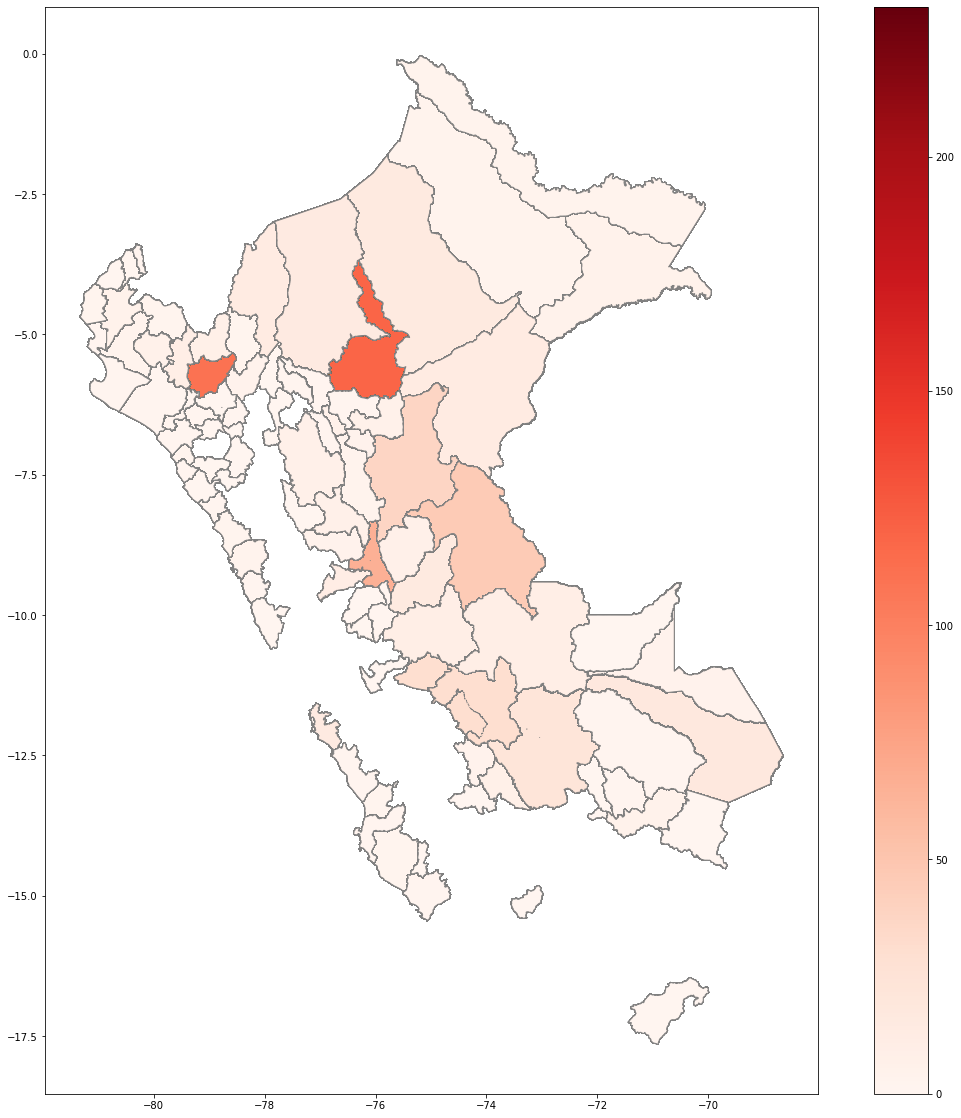

In [61]:
prov_shp.plot( column='Casos', cmap='Reds', 
          figsize=(20, 20),
          linestyle='-',
          edgecolor='gray',
          legend = True )

<AxesSubplot:>

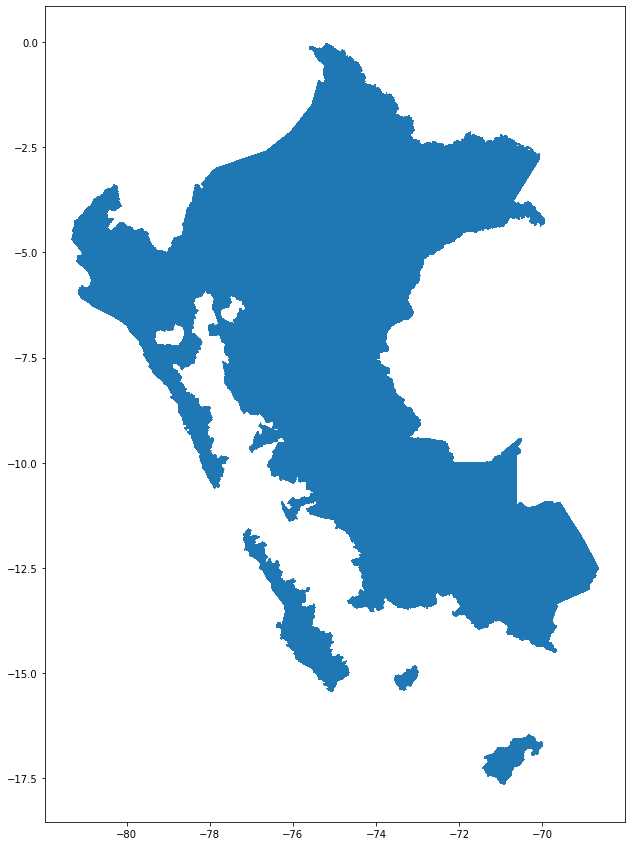

In [62]:
fig2, ax = plt.subplots( figsize = ( 12, 15 ) )
prov_shp.plot( ax = ax )

# 6 Use geopandas to plot the number of cases by the department for all the years using subplots. Every subplot for each year. **Do not forget to indicate the color of NA values.** Use this shapefile. For this task, you will have to aggregate shapefiles at the department level.

In [ ]:
#dpt_shp = table4.dissolve( by = 'CCDD' )

In [ ]:
#dpt_shp

In [64]:
table7 = table2[['CCDD', 'geometry']]
table7 = table7.dissolve( by = 'CCDD' ).reset_index()
table7 = table7.rename(columns={'CCDD':'Ubigeo_Departments'})
table7

,Ubigeo_Departments,geometry
0,01,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741..."
1,02,"POLYGON ((-77.70189 -10.32392, -77.70434 -10.3..."
2,03,"POLYGON ((-73.51174 -14.53852, -73.51368 -14.5..."
3,04,"POLYGON ((-72.72968 -16.64631, -72.73106 -16.6..."
4,05,"POLYGON ((-74.50188 -15.16058, -74.50191 -15.1..."
5,06,"POLYGON ((-79.07326 -7.46865, -79.08528 -7.462..."
6,07,"POLYGON ((-77.10456 -12.06373, -77.10449 -12.0..."
7,08,"POLYGON ((-71.89418 -14.78954, -71.89579 -14.7..."
8,09,"POLYGON ((-75.23983 -14.04591, -75.25853 -14.0..."
9,10,"POLYGON ((-76.80833 -10.39296, -76.81024 -10.3..."


In [65]:
dpt_shp = table7.merge(table1)
dpt_shp

,Ubigeo_Departments,geometry,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,Ubigeo_Provinces
0,01,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",2021,41,Dengue,AMAZONAS,EL PARCO,BAGUA,010204,NaN,0102
1,01,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",2021,41,Dengue,AMAZONAS,COPALLIN,BAGUA,010203,NaN,0102
2,01,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",2021,41,Dengue,AMAZONAS,BAGUA GRANDE,UTCUBAMBA,010701,NaN,0107
3,01,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",2021,42,Dengue,AMAZONAS,EL PARCO,BAGUA,010204,NaN,0102
4,01,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",2021,42,Dengue,AMAZONAS,COPALLIN,BAGUA,010203,NaN,0102
...,...,...,...,...,...,...,...,...,...,...,...
172139,25,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904...",2019,49,Dengue,UCAYALI,PADRE ABAD,PADRE ABAD,250301,0.0,2503
172140,25,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904...",2019,50,Dengue,UCAYALI,PADRE ABAD,PADRE ABAD,250301,0.0,2503
172141,25,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904...",2019,51,Dengue,UCAYALI,PADRE ABAD,PADRE ABAD,250301,0.0,2503
172142,25,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904...",2019,52,Dengue,UCAYALI,PADRE ABAD,PADRE ABAD,250301,0.0,2503


MemoryError: Unable to allocate 280. KiB for an array with shape (17930, 2) and data type float64

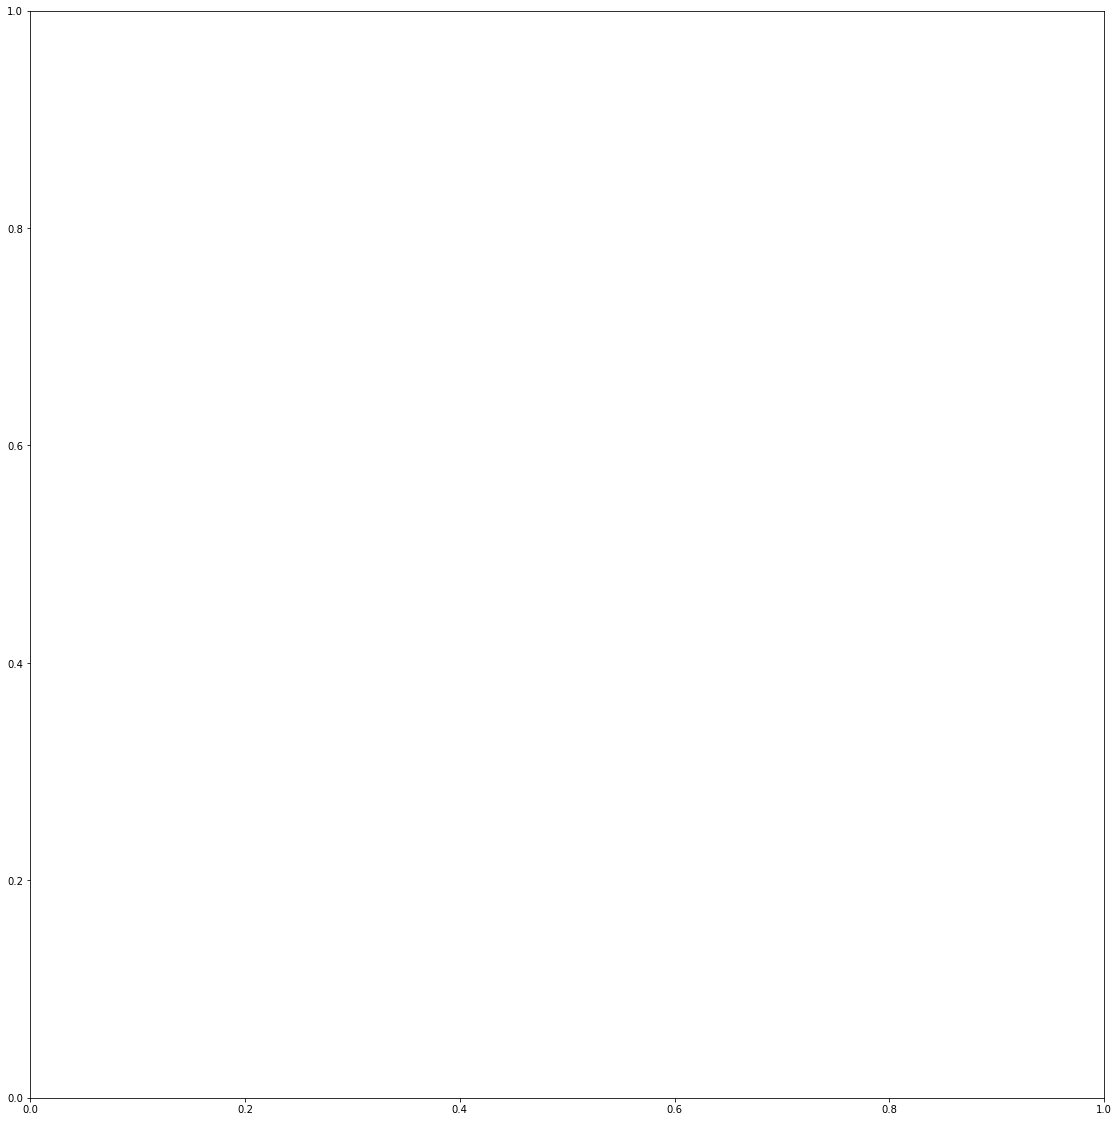

In [67]:
dpt_shp.plot( column='Casos', cmap='Reds', 
          figsize=(20, 20),
          linestyle='-',
          edgecolor='gray',
          legend = True )

In [ ]:
fig, axis = plt.subplots( nrows = 4, ncols= 3, figsize = ( 15, 15 ) )

idx = 0
for i in range( 4 ):
    for j in range ( 3 ):
        
        
        ax = axis[ i ][ j ]
        
        Año = dpt_shp.Año.unique()[ idx ]
        
        df6 = dpt_shp[ dpt_shp.Año == Año ]
        
        df6.plot( column='prop_wom', 
                  cmap='Reds', 
                  linestyle='--',
                  edgecolor='black', 
                  legend = True, 
                  ax = ax 
                )
        
        ax.set_title( Año )
        
        idx = idx + 1

### Use geopandas to plot the number of cases by the department for all 2021 quarters using subplots. Every subplot for each quarter. Use a categorical legend with 5 bins. Do not forget to indicate the color of NA values. 

In [ ]:
dpt_shp = table5.merge(dengue_2021)
dpt_shp